number of simplices: 271233
number of unique simplices: 147222
Node index should begin with 0, reindexing the hypergraphs ...
number of nodes in construct graph 3029


INFO:root:Finish loading graphs.
INFO:root:Nodes train: 3029
INFO:root:Simplicies train: 147222


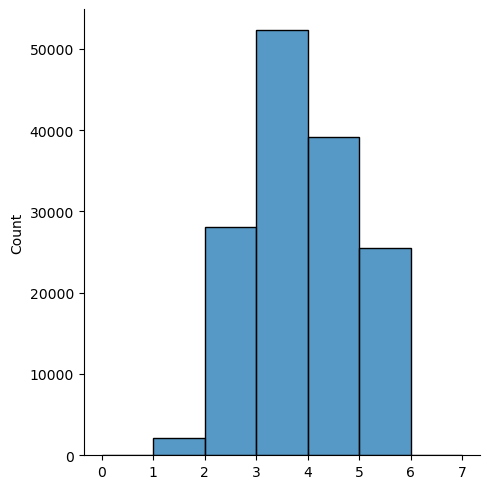

In [35]:
# load the hypergraph
import yaml
import logging
import os
import sys
import random

import numpy as np
import seaborn as sns
import networkx as nx

from utils import load_graphs
from cliques import compute_cliques


logging.basicConfig(level=logging.INFO)
logger = logging.getLogger()
logger.setLevel(logging.INFO)

config  = yaml.safe_load(open('./config.yaml'))
config['dataset'] = 'tags-ask-ubuntu'
config['beta'] = 30000
graphs = load_graphs(config, logger)


data = np.array([len(s) for s in graphs['simplicies_train']])
hist, bins = np.histogram(data, bins=np.linspace(1, 8, 8))
sns.displot(data, bins=range(8))

In [36]:
# # sampling cliques
# os.remove(f'{config['data_dir']}/{config['dataset']}/cliques_train.pkl')
# os.remove(f'{config['data_dir']}/{config['dataset']}/rho.pkl')

cliques = compute_cliques(graphs, config, logger)
sample_cliques_table = cliques['children_cliques_train']
# print(sample_cliques_table)

sample_cliques = []

for v in sample_cliques_table.values():
    sample_cliques = sample_cliques + v

sample_cliques = [list(c) for c in sample_cliques]
set_sample_cliques = list(set([tuple(sorted(e)) for e in sample_cliques]))
print(f'len of origin:{len(sample_cliques)}, len of deduplicates： {len(set_sample_cliques)}')

# random.shuffle(set_sample_hyperedges)
sample_clique_sizes = [len(c) for c in set_sample_cliques]
data = np.array(sample_clique_sizes)
hist, bins = np.histogram(data, bins=np.linspace(0, 5, 6))
sns.displot(data, bins=range(8))

INFO:root:Start computing cliques
INFO:root:Couldn't find cache for max cliques train


: 

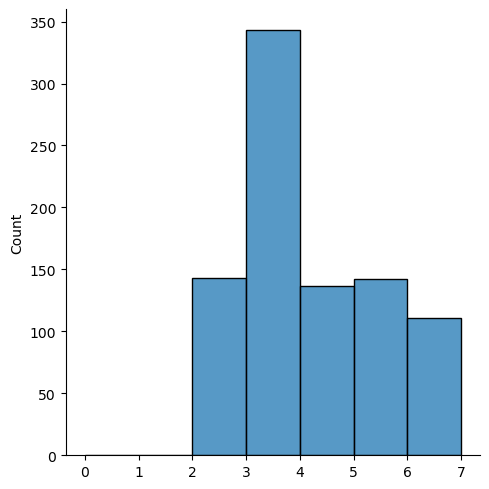

In [31]:
import utils
# from utils import lazy_clique_edge_cover
from importlib import reload
reload(utils)

# reconstruct the hypergraph by clique cover
G = graphs['G_weighted']

# YOU GUY!!!!!!!!!!!!!!!!!!!!!!
# BAD API!!!!!!!!!!!!!!!!!!!!!!
weighted_adjacency_matrix = nx.to_numpy_array(G, nodelist=sorted(G.nodes()))
reconstruct_hyperedges = utils.lazy_clique_edge_cover(weighted_adjacency_matrix, set_sample_cliques, len(graphs['simplicies_train']))
reconstruct_hyperedges_sizes = [len(e) for e in reconstruct_hyperedges]

data = np.array(reconstruct_hyperedges_sizes)
hist, bins = np.histogram(data, bins=np.linspace(0, 5, 6))
sns.displot(data, bins=range(8))

In [32]:
# print(reconstruct_hyperedges)
set_reconstruct_hyperedges = set([tuple(sorted(e)) for e in reconstruct_hyperedges])
print(f'len: {len(set_reconstruct_hyperedges)}, {set_reconstruct_hyperedges}')
print(f'len: {len(set_reconstruct_hyperedges)}, {set_reconstruct_hyperedges}')

precision, recall, f1, jaccard = utils.get_performance_wrt_ground_truth(set_reconstruct_hyperedges, graphs['simplicies_train'])
print(f'precision: {precision}, recall: {recall}, f1: {f1}, jaccard: {jaccard}')


len: 1088, {(40, 41, 42, 43, 77), (125, 275, 398), (40, 766, 767), (110, 111, 137, 138, 139, 561), (125, 276, 488), (4, 40, 41, 42, 43, 52, 73, 74, 77, 78, 79, 131, 468, 524), (177, 178, 181, 720, 902), (58, 86), (177, 178, 700, 701, 702), (126, 398, 490), (178, 179, 181, 720, 727), (70, 71, 72), (377, 378, 379), (103, 104, 159, 160, 954, 955), (177, 178, 179, 181, 716, 721, 722, 723, 731, 734, 735, 736, 943), (114, 115, 187, 190), (192, 193), (569, 570), (1023, 1024), (177, 178, 179, 181, 274, 275, 276, 277, 278, 398, 488, 489, 490, 700, 701, 702, 703, 725, 770), (177, 178, 179, 181, 874, 1002), (177, 178, 700, 702, 703), (10, 45), (178, 179, 703), (4, 40, 50, 51, 52, 215, 216, 217), (2, 469, 470, 471), (176, 177, 178, 179, 180, 181, 714, 716, 717, 718, 719, 720, 727, 730, 732, 733, 734, 735, 736), (177, 181, 700, 701, 702, 703, 740), (275, 278, 398), (99, 100, 101, 122, 123, 124), (176, 177, 179, 180, 181, 714, 716, 717, 718, 719, 720, 727, 730, 731, 732, 733, 734, 735, 736, 943), (1